In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [124]:
image = img.imread('https://lh3.googleusercontent.com/proxy/gnYmX0bE0xZVKz5KbNqeGdy0g8GPdWkY7OiXtcNuF7cCHxZJudNcy0Esf6sDVqovZtnIvvWqxWL6FAA71vmZkM1YzR0P0EPlUA73tcWExvuf2KOM')
if image.ndim == 3:
    image = np.mean(image, axis = -1)

In [125]:
def fuzzyCMeans(data, k, m = 2, verbose = False, max_iterations = None):
    n = data.shape[0]
    f = data.shape[1]
    U = np.ndarray((n, k))
    D = np.ndarray((n, k))
    #step 1 randomly initialise U
    for i in range(n):
        U[i, :] = np.random.dirichlet(np.ones(k))
    C = np.zeros((k, f))
    C_ = np.ones((k, f))
    centroids_change = True
    iteration = 1
    while(centroids_change and (not max_iterations or iteration <= max_iterations)):
        #step 2 compute centroid
        for i in range(k):
            C_[i] = np.dot(U[:, i]**m, data)/np.sum(U[:, i]**m)
        if np.array_equal(C, C_):
            centroids_change = False
        C = np.copy(C_)
        #step 3 compute distance matrix
        for i in range(n):
            for j in range(k):
                D[i, j] = np.linalg.norm(data[i]-C[j])
        #step 4 update membership matrix
        for j in range(k):
            U[:, j] = (D[:, j]**(-1/(m-1)))/(np.sum(D**(-1/(m-1)), axis = 1))
        if verbose:
            print("Iteration: ", iteration)
            print("Cluster centers:\n", C)
        iteration = iteration+1
    return U, C

In [126]:
data = np.ndarray((image.shape[0]*image.shape[1], 1), np.float64)
k = 0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        data[k, 0] = image[i][j]
        k = k+1

In [127]:
U, C = fuzzyCMeans(data, 3, 2, False, 100)

In [128]:
segmented = np.ndarray(image.shape)
for i in range(segmented.shape[0]):
    for j in range(segmented.shape[1]):
        k = i*segmented.shape[0]+j
        segmented[i][j] = C[np.argmax(U[k, :])]

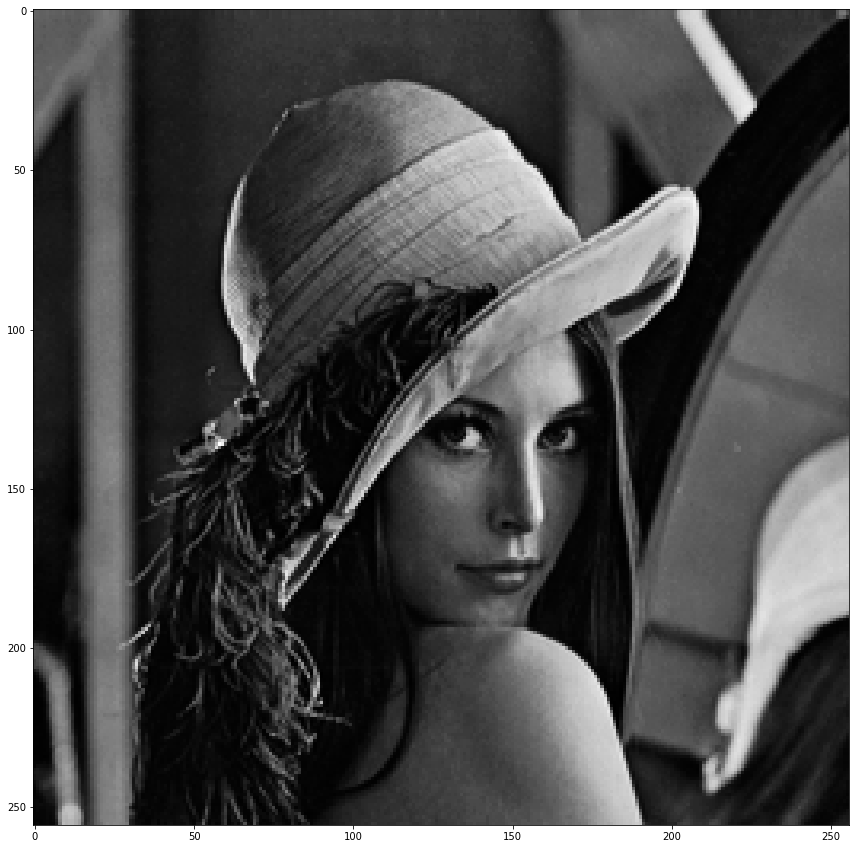

In [129]:
plt.figure(figsize=[15, 15])
plt.imshow(image, cmap = 'Greys_r')

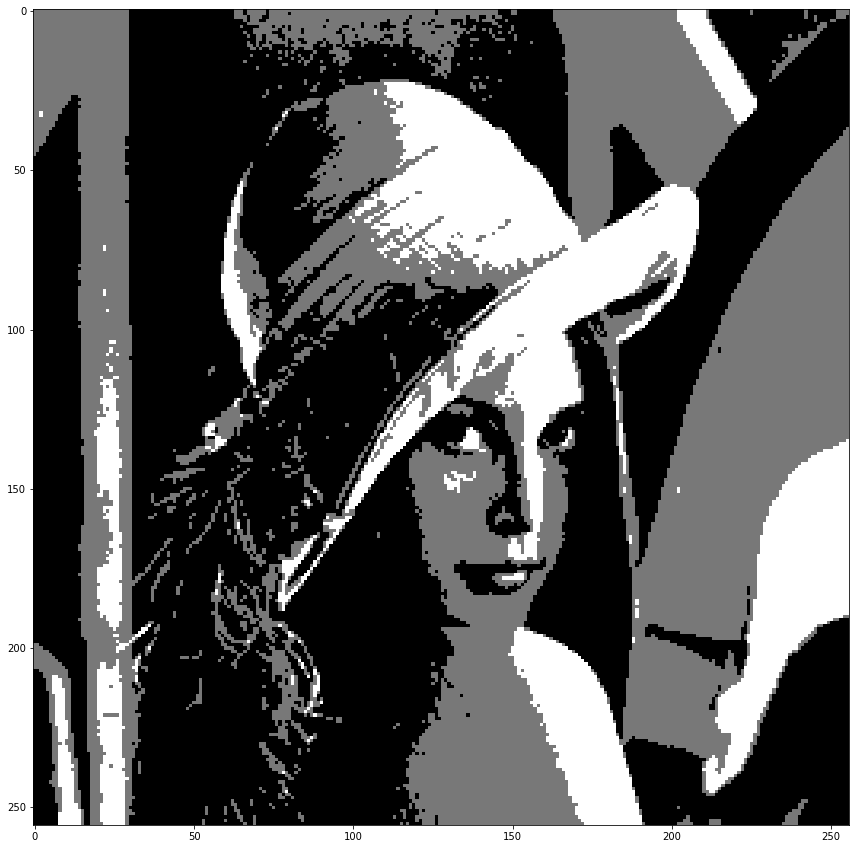

In [130]:
plt.figure(figsize=[15, 15])
plt.imshow(segmented, cmap = 'Greys_r')